# Convolutional Neural Networks

`Computer Vision and Intelligence Group, IIT Madras`

# Training a ConvNet on the notMNIST dataset
For this notebook, we will be using the **notMNIST** dataset, which consists of images of **alphabets A - J** written in different styles. 

Download required files here:

https://drive.google.com/file/d/1krtsuAxfKwqcOFyyN0ZfYrrNS8iczFp1/view?usp=sharing

https://drive.google.com/file/d/1EMwvZ46VbcRWS9rAo-qs467sf8X5GWOs/view?usp=sharing

https://drive.google.com/file/d/1doaanFK584-ZesCVWbmGA5B88M6Lqbr7/view?usp=sharing

https://drive.google.com/file/d/1fKdrcG22JMG9ym4sMdRpn2kELBJbGS37/view?usp=sharing

https://drive.google.com/file/d/1feQd8xZRZUzJ7kR7omjXMW0fOOkEEHmN/view?usp=sharing.

In [0]:
!pip install tensorflow
!pip install keras
!pip install opencv-python

    100% |████████████████████████████████| 890kB 695kB/s ta 0:00:01
  Running setup.py bdist_wheel for html5lib ... done
  Stored in directory: /Users/Ankivarun/Library/Caches/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 2.1.3
    Uninstalling bleach-2.1.3:
      Successfully uninstalled bleach-2.1.3
You are using pip version 9.0.2, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.2, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 41.2MB 30kB/s eta 0:00:011   28% |█████████                       | 11.7MB 1.1MB/s eta 0:00:26    35% |███████████▍                    | 14.6MB 1.7M

In [0]:
# These are all the modules we'll be using later. Make sure you can import them before proceeding further.
from __future__ import print_function
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from six.moves import cPickle as pickle
import os
from six.moves import range
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
import cv2
import warnings
warnings.simplefilter('ignore')

/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


The dataset has been converted into a **pickle file**, which is a common and efficient way for using datasets in deep learning.

In [0]:
pickle_file = './notMNIST.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    train_dataset = save['train_dataset']
    train_labels = save['train_labels']
    valid_dataset = save['valid_dataset']
    valid_labels = save['valid_labels']
    test_dataset = save['test_dataset']
    test_labels = save['test_labels']
    del save  # hint to help free up memory
    print('\n')
    print('Training set: ', train_dataset.shape, train_labels.shape)
    print('Validation set: ', valid_dataset.shape, valid_labels.shape)
    print('Test set: ', test_dataset.shape, test_labels.shape)



Training set:  (200000, 28, 28) (200000,)
Validation set:  (10000, 28, 28) (10000,)
Test set:  (10000, 28, 28) (10000,)


We have **200000** train samples, **10000** validation samples and **10000** test samples.
**Image size** is 28x28.

In [0]:
# Reformat into a Keras/TensorFlow-friendly shape:
# - Convolutions need the image data formatted as a cube (width by height by #channels)
# - Labels as float one-hot encodings.

image_size = 28
num_labels = 10               # letters A to J
num_channels = 1              # grayscale

def reformat(dataset, labels):
    # Reformat the dataset into 28x28x1 size
    dataset = dataset.reshape((-1, image_size, image_size, num_channels)).astype(np.float32)
    labels = np_utils.to_categorical(labels, num_labels)
    return dataset, labels

train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('\n')
print('Training set: ', train_dataset.shape, train_labels.shape)
print('Validation set: ', valid_dataset.shape, valid_labels.shape)
print('Test set: ', test_dataset.shape, test_labels.shape)



Training set:  (200000, 28, 28, 1) (200000, 10)
Validation set:  (10000, 28, 28, 1) (10000, 10)
Test set:  (10000, 28, 28, 1) (10000, 10)


# Defining the model

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

# number of convolutional filters to use
nb_filters = 32

# size of pooling area for max pooling
pool_size = (2, 2)

# convolution kernel size
kernel_size = (3, 3)

input_shape = (img_rows, img_cols, 1)

In [0]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],border_mode='valid',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))                             # Indicates the probability of keeping a particular node

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

# Visualising the model

In [0]:
model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
__________

The Network can be visualised as below:

![cnn_layers](cnn_layers.png "Title")

In [0]:
b_size = 32                         # batch size
epochs = 5                          


## Training from scratch
# Create checkpoint
# filepath = "notMNIST.hdf5"
# checkpoint = ModelCheckpoint(filepath,monitor='val_acc',verbose=0,save_best_only=True,mode='max')
# callbacks_list = [checkpoint]

# Train the model
# history = model.fit(train_dataset,train_labels,batch_size=b_size, nb_epoch=epochs,
#                     verbose=1, validation_data=(valid_dataset, valid_labels),callbacks=callbacks_list)

# print("Model saved")
##


## Load pre-trained weights
model.load_weights('./notMNIST.hdf5')

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
##

score = model.evaluate(test_dataset, test_labels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.14883870215415954
Test accuracy: 0.9543


Now, let us make a prediction on an image here, just to check if it works. 

We load an image 'B.png' which contains the letter **B**, and change it to shape [1,28,28,1] so that it can be passed into the model.

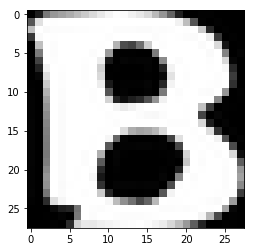

(1, 28, 28, 1)

In [0]:
im = cv2.imread('B.png',0)
plt.imshow(im,cmap='gray')
plt.show()
im = np.expand_dims(im,2) 
im = np.expand_dims(im,0)
im.shape

Here, we use the **model.predict** function of Keras to generate prediction for this image. 

In [0]:
predictions = model.predict(im)  
print(predictions)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


We have obtained the prediction as a **one-hot vector** with second entry 1, which means that the label refers to B.

---



# Covnet Architectures

![alt text](https://cdn-images-1.medium.com/max/800/1*kBpEOy4fzLiFxRLjpxAX6A.png)

[Reference](https://arxiv.org/abs/1605.07678)



# LENET5

It is the year 1994, and this is one of the very first convolutional neural networks, and what propelled the field of Deep Learning. 

This pioneering work by Yann LeCun was named LeNet5 after many previous successful iterations since they year 1988.

![alt text](https://cdn-images-1.medium.com/max/800/0*V1vb9SDnsU1eZQUy.jpg)



The LeNet5 architecture was fundamental, in particular the insight that image features are distributed across the entire image, and convolutions with learnable parameters are an effective way to extract similar features at multiple location with few parameters. 

At that time there was no GPU to help training, and even CPUs were slow.

Being able to save parameters and computation was a key advantage. Still not enough for deployment back then


LeNet5 features can be summarized as:

* convolutional neural network use sequence of 3 layers: convolution, pooling, non-linearity

* use convolution to extract spatial features

* non-linearity in the form of tanh or sigmoids (no ReLus back then)

* multi-layer neural network (MLP) as final classifier

* sparse connection matrix between layers to avoid large computational cost

## THE GAP

In the years from 1998 to 2010 neural network were in incubation.

Most people did not notice their increasing power, while many other researchers slowly progressed. 

Wasnot till 2010, when GPUs plus Deep training strategies allowed for their usage, first in the DAN CIRESAN NET.

# IMAGENET



# ALEXNET

In 2012, Alex Krizhevsky released AlexNet which was a deeper and much wider version of the LeNet and won by a large margin the difficult ImageNet competition.

Wide as in 20+% !

![alt text](https://cdn-images-1.medium.com/max/800/0*vsi8JJFV_O6Z34ks.png)

AlexNet scaled the insights of LeNet into a much larger neural network that could be used to learn much more complex objects and object hierarchies. The contribution of this work were:

* use of rectified linear units (ReLU) as non-linearities
* use of dropout technique (Hinton et all) to selectively ignore single neurons during training, a way to avoid overfitting of the model
* overlapping max pooling, avoiding the averaging effects of average pooling
* use of GPUs NVIDIA GTX 580 to reduce training time

At the time GPU offered a much larger number of cores than CPUs, and allowed 10x faster training time, which in turn allowed to use larger datasets and also bigger images.

The success of AlexNet started a small revolution. Convolutional neural network were now the workhorse of Deep Learning, which became the new name for “large neural networks that can now solve useful tasks”.

# VGG

The VGG networks from Oxford were the first to use much smaller 3×3 filters in each convolutional layers and also combined them as a sequence of convolutions.

This seems to be contrary to the principles of LeNet, where large convolutions were used to capture similar features in an image.

Instead of the 9×9 or 11×11 filters of AlexNet, filters started to become smaller, too dangerously close to the infamous 1×1 convolutions that LeNet wanted to avoid, at least on the first layers of the network. 

But the great advantage of VGG was the insight that multiple 3×3 convolution in sequence can emulate the effect of larger receptive fields, for examples 5×5 and 7×7. These ideas will be also used in more recent network architectures as Inception and ResNet.

![alt text](https://cdn-images-1.medium.com/max/800/0*HREIJ1hjF7z4y9Dd.jpg)

![alt text](https://qph.fs.quoracdn.net/main-qimg-ba81c87204be1a5d11d64a464bca39eb)

The VGG networks uses multiple 3×3 convolutional layers to represent complex features. 

Notice blocks 3, 4, 5 of VGG-E: 256×256 and 512×512 3×3 filters are used multiple times in sequence to extract more complex features and the combination of such features. 

This is effectively like having large 512×512 classifiers with 3 layers, which are convolutional! This obviously amounts to a massive number of parameters, and also learning power. 

But training of these network was difficult, and had to be split into smaller networks with layers added one by one. All this because of the lack of strong ways to regularize the model, or to somehow restrict the massive search space promoted by the large amount of parameters.

VGG used large feature sizes in many layers and thus inference was quite costly at run-time. Reducing the number of features, as done in Inception bottlenecks, will save some of the computational cost.



## Let's run inferences on VGG-16

In [0]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/African_Bush_Elephant.jpg/440px-African_Bush_Elephant.jpg -o  elephant.jpg

In [0]:
!ls

440px-African_Bush_Elephant.jpg
African_elephant_warning_raised_trunk.jpg
CNN.ipynb
Tf_poets
elephant.jpg


In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet')

img_path='a.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

40960/35363 [==================================] - 2s 55us/step
Predicted: [('n02504458', 'African_elephant', 0.914321), ('n01871265', 'tusker', 0.08234793), ('n02504013', 'Indian_elephant', 0.0032958146)]


# GoogleNet and Inception
_Let the Games begin XD_

[Christian Szegedy](https://arxiv.org/abs/1409.4842) from Google begun a quest aimed at reducing the computational burden of deep neural networks, and devised the GoogLeNet the first Inception architecture.

By now, Fall 2014, deep learning models were becoming extermely useful in categorizing the content of images and video frames. 

Most skeptics had given in that Deep Learning and neural nets came back to stay this time. Given the usefulness of these techniques, the internet giants like Google were very interested in efficient and large deployments of architectures on their server farms.

Christian thought a lot about ways to reduce the computational burden of deep neural nets while obtaining state-of-art performance (on ImageNet, for example). Or be able to keep the computational cost the same, while offering improved performance.

He and his team came up with the Inception module:

![alt text](https://cdn-images-1.medium.com/max/800/0*CJZdXZULMr_on1Ao.jpg)



This at a first glance is basically the parallel combination of 1×1, 3×3, and 5×5 convolutional filters.

But the great insight of the inception module was the use of 1×1 convolutional blocks (NiN) to reduce the number of features before the expensive parallel blocks. This is commonly referred as “bottleneck”. T

GoogLeNet used a stem without inception modules as initial layers, and an average pooling plus softmax classifier similar to NiN. This classifier is also extremely low number of operations, compared to the ones of AlexNet and VGG. This also contributed to a very efficient network design.

![alt text](https://i.stack.imgur.com/Xqv0n.png)

## Why multiple softmaxes?

Deep architectures, and specifically GoogLeNet (22 layers) are in danger of the vanishing gradients problem during training (back-propagation algorithm). 

The engineers of GoogLeNet addressed this issue by adding classifiers in the intermediate layers as well, such that the final loss is a combination of the intermediate loss and the final loss. This is why you see a total of three loss layers, unlike the usual single layer as the last layer of the network.

![alt text](https://i.stack.imgur.com/U6O7Wl.png)

# Bottleneck layers

Was reducing the number of features, and thus operations, at each layer, so the inference time could be kept low. 

Before passing data to the expensive convolution modules, the number of features was reduce by, say, 4 times. This led to large savings in computational cost, and the success of this architecture.

Say you have 256 features coming in, and 256 coming out, and let’s say the Inception layer only performs 3×3 convolutions. 

That is 256×256 x 3×3 convolutions that have to be performed (589,000s multiply-accumulate, or MAC operations). 

Instead of doing this, we decide to reduce the number of features that will have to be convolved, say to 64 or 256/4. In this case, we first perform 256 -> 64 1×1 convolutions, then 64 convolution on all Inception branches, and then we use again a 1×1 convolution from 64 -> 256 features back again. The operations are now:

* 256×64 × 1×1 = 16,000s
* 64×64 × 3×3 = 36,000s
* 64×256 × 1×1 = 16,000s

For a total of about 70,000 versus the almost 600,000 we had before. Almost 10x less operations!

And although we are doing less operations, we are not losing generality in this layer. In fact the bottleneck layers have been proven to perform at state-of-art on the ImageNet dataset, for example, and will be also used in later architectures such as ResNet.

The reason for the success is that the input features are correlated, and thus redundancy can be removed by combining them appropriately with the 1×1 convolutions. Then, after convolution with a smaller number of features, they can be expanded again into meaningful combination for the next layer.

![alt text](https://raw.githubusercontent.com/ritchieng/machine-learning-nanodegree/master/deep_learning/convolutional_neural_nets/cn19.png)

Credits: Udacity

Now let's redo an inference for Inception v3. 

Let's also redo a transfer learning for Resnet-50.

Hint:

Think of   
`
from keras.applications.inception_v3 import InceptionV3`

And

InceptionV3 is your new class.

# INCEPTION V3 (AND V2)

In February 2015 Batch-normalized Inception was introduced as Inception V2. 

Batch-normalization computes the mean and standard-deviation of all feature maps at the output of a layer, and normalizes their responses with these values. This corresponds to “whitening” the data, and thus making all the neural maps have responses in the same range, and with zero mean. This helps training as the next layer does not have to learn offsets in the input data, and can focus on how to best combine features.

In December 2015 Google released a new version of the Inception modules and the corresponding architecture This article better explains the original GoogLeNet architecture, giving a lot more detail on the design choices. A list of the original ideas are:

* maximize information flow into the network, by carefully constructing networks that balance depth and width. Before each pooling, increase the feature maps.

* when depth is increased, the number of features, or width of the layer is also increased systematically

* use width increase at each layer to increase the combination of features before next layer

* use only 3×3 convolution, when possible, given that filter of 5×5 and 7×7 can be decomposed with multiple 3×3. 

![alt text](https://cdn-images-1.medium.com/max/800/0*Y9mKbwp1R8vAmT2L.jpg)

filters can also be decomposed by flattened convolutions into more complex modules:

![alt text](https://cdn-images-1.medium.com/max/800/0*rRv_N9rLYJnmq6jz.jpg)

Inception modules can also decrease the size of the data by provide pooling while performing the inception computation. 

This is basically identical to performing a convolution with strides in parallel with a simple pooling layer:

![alt text](https://cdn-images-1.medium.com/max/800/0*rxf30_SJRsbFIFCW.jpg)

Inception still uses a pooling layer plus softmax as final classifier.

Inception v3 in full glory:

![alt text](https://www.packtpub.com/graphics/9781786466587/graphics/image_08_007.jpg)


# RESNET

The revolution then came in December 2015, at about the same time as Inception v3. ResNet have a simple ideas: feed the output of two successive convolutional layer AND also bypass the input to the next layers!

![alt text](https://cdn-images-1.medium.com/max/800/0*0r0vS8myiqyOb79L.jpg)


![alt text](https://i.stack.imgur.com/ElFiI.png)

Similar approaches as inception though (bottlenecks)

Also, has variants- Resnet (34 layers), Resnet 50, Resnet 101 XD.

# Inception v4 or Inception_Resnet_v2
_There's no method to this madness_

And Christian and team are at it again with a new version of Inception.

The Inception module after the stem is rather similar to Inception V3:

![alt text](https://cdn-images-1.medium.com/max/800/0*SJ7DP_-0R1vdpVzv.jpg)


They also combined the Inception module with the ResNet module:

![alt text](https://cdn-images-1.medium.com/max/800/0*exGWbD4A0QKM2lU_.jpg)

# SqueezeNet

The paper of SqueezeNet provides a smart architecture as well as a quantitative analysis. For the same accuracy of AlexNet, SqueezeNet can be 3 times faster and 500 times smaller.

The main ideas of SqueezeNet are:

1. Using 1x1(point-wise) filters to replace 3x3 filters, as the former only 1/9 of computation.
2. Using 1x1 filters as a bottleneck layer to reduce depth to reduce computation of the following 3x3 filters.
3. Downsample late to keep a big feature map.


The building brick of SqueezeNet is called fire module, which contains two layers: a squeeze layer and an expand layer. A SqueezeNet stackes a bunch of fire modules and a few pooling layers. 

The squeeze layer and expand layer keep the same feature map size, while the former reduce the depth to a smaller number, the later increase it. The squeezing (bottoleneck layer) and expansion behavior is common in neural architectures. Another common pattern is increasing depth while reducing feature map size to get high level abstract.

![alt text](https://cdn-images-1.medium.com/max/1600/1*dVaL1bcv5Ewpz-wen7IXCA.png)

Credits: [Squeenet](https://github.com/DeepScale/SqueezeNet)

# Inception V3 on CIFAR 10

In [0]:
import cv2
import numpy as np

from keras.datasets import cifar10
from keras import backend as K
from keras.utils import np_utils

nb_train_samples = 3000 # 3000 training samples
nb_valid_samples = 100 # 100 validation samples
num_classes = 10

def load_cifar10_data(img_rows, img_cols):

    # Load cifar10 training and validation sets
    (X_train, Y_train), (X_valid, Y_valid) = cifar10.load_data()

    # Resize trainging images
    if K.image_dim_ordering() == 'th':
        X_train = np.array([cv2.resize(img.transpose(1,2,0), (img_rows,img_cols)).transpose(2,0,1) for img in X_train[:nb_train_samples,:,:,:]])
        X_valid = np.array([cv2.resize(img.transpose(1,2,0), (img_rows,img_cols)).transpose(2,0,1) for img in X_valid[:nb_valid_samples,:,:,:]])
    else:
        X_train = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_train[:nb_train_samples,:,:,:]])
        X_valid = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_valid[:nb_valid_samples,:,:,:]])

    # Transform targets to keras compatible format
    Y_train = np_utils.to_categorical(Y_train[:nb_train_samples], num_classes)
    Y_valid = np_utils.to_categorical(Y_valid[:nb_valid_samples], num_classes)

    return X_train, Y_train, X_valid, Y_valid

In [0]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(200, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model.fit_generator(model, steps_per_epoch=None, epochs=1, verbose=1, callbacks=None, validation_data=X_valid, validation_steps=None, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit_generator(generator, steps_per_epoch=None, epochs=1, verbose=1, callbacks=None, validation_data=X_valid, validation_steps=None, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0)

# Mobilenets

 Core layers that MobileNet is built on which are depthwise separable filters (factorised filters).
 
 Depthwise separable convolution are made up of two layers: depthwise convolutions and pointwise convolutions. 
 
 Depthwise convolutions are used to apply a single filter per each input channel (input depth). Pointwise convolution, a simple 1x1
 convolution, is then used to create a linear combination of the output of the depthwise layer. MobileNets use both batchnorm and ReLU nonlinearities for both layers.
 
 * Also uses width and resolution multipliers to save on computation
 
 * Even more effective than Squeezenet

# Depth wise convolves

Depthwise separable convolutions which is a form of factorized convolutions which factorize a standard convolution into a depthwise convolution and a 1x1 convolution called a pointwise convolution.

![alt text](https://raw.githubusercontent.com/joshua19881228/my_blogs/master/Computer_Vision/Reading_Note/figures/Reading_Note_20170719_MobileNet_0.png)

![alt text](https://raw.githubusercontent.com/joshua19881228/my_blogs/master/Computer_Vision/Reading_Note/figures/Reading_Note_20170719_MobileNet_2.png)

# Transfer Learning with Mobilenets

Clone the repo here: [link](https://github.com/varun19299/Tensorflow_poets.git)